# CNN Tutorial

by Egan McClave

## Table of Contents

In this tutorial, we'll cover the following topics:  
- Introduction
- Explaining Convolutional Neural Networks
- Installing the libraries
- Loading and understanding the data
- Building the network
- Running and Evaluating the CNN

## Introduction

This tutorial will introduce the topic of Convolutional Neural Networks and a run through a brief application. This tutorial will assume a basic knowledge of Neural Networks but will provide a basic review of necessary concepts. 

Neural Networks were inspired by the biological neural networks of the brain. Neural Networks are made up of 3 different types of layers: Input Layer, Hidden Layer, Output Layer. Each layer can consist of any number of neurons/nodes

A basic example of a 1 Layer Neural Network:  

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/592px-Colored_neural_network.svg.png">](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/592px-Colored_neural_network.svg.png)

Each node represents an artificial neuron that takes an input from the arrow on the left and returns an output through an arrow on the right. Outputs of each node is calculated through some non-linear function with the sum of its inputs.



Convolutional Neural Networks are primarily used for analyzing visual imagery - specifically in this tutorial it will be featured in image recognition. CNNs apply a series of filters to the raw pixel data of an image to extract and learn the high-level features. These high-level features can then be used to classify any input image and generate predictions more accurate than humans.

In general, CNNs contain 3 main components:

1) Convolutional Layers: Apply a specific convolutional filter to the input image and receive another (potentially smaller) output image  
2) Pooling Layers: Used to extract the “important” information from the convolutional layers and reduces the dimensionality of the dataset which can speed up the overall processing time of the program  
3) Fully Connected (Dense) Layers: Performs classification on the features collected by the convolutional and pooling layers

## Explaining Convolutional Neural Networks

### Convolutional Layers

Convolutional layers (conv. layer) are what define CNNs. Every image can be represented as a matrix of pixel values. In the gif, below we have a 5 by 5 image of values and a filter of size 3 by 3. The output, a feature map/convolved feature, is the result of performing the dot product between the image and the filter to every potential group of cells in the image.
[<img src = "http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif">](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

It is important to notice that different values in the filter matrix can produce different feature maps. Prior to CNNs, filters had to be programmatically filled by an expert who understood the field of study the application was to be used in. However, now CNNs can learn the values of these filters during the training step (other paramters must be specified instead like the number of filters, the size of the filter, etc...). 

Three of the more important parameters that will be explained in detail are: Depth, Stride, and Padding.

Specifying the depth tells us the number of filters to be used on the input matrix. Imagine for depth $ > 1$ the returned feature maps are stacked on one another so the output of a conv. layer would have shape of feature map by depth paramter. 

Specifying the stride tells us number of cells the filter needs to slide over the input matrix. The gif above uses a stride of 1. Having a stride of 2 tells the filter to move over 2 pixels before computing the dot product.

Specifying the padding tels us whether the input matrix should have an additional border of cells with `0`s to create a "new" input matrix. When the filter is applied to the enlarged input matrix the new feature map is the same dimension as the original matrix (old 5x5 input $\rightarrow$ new 7x7 input $\xrightarrow[\text{3x3 filter}]{}$ 5x5 feature map).

At the end of every conv. layer we apply a non-linear function to rectify the results of our feature map. In real-world examples, data is hardly ever linear so by introducing non-linearity into the model we can help with overall generalization to testing examples. The common function used for this is the ReLU (Rectified Linear Unit) function whose output is: $\max(0, \text{input value})$. This in effect highlights all of the positive pixel values by replacing all the negative pixel values in the feature map with `0`s. Other common non-linear functions include: tanh or sigmoid.

### Pooling Layers

Pooling layers assist with reducing the dimensionality of the feature maps and return the most "important" information. There are many different types of pooling but the main there include: Max, Average, and Sum. In the pooling layer, we apply some of the same techniques as in the conv. layer; for all types of pooling we have an input matrix, a filter, and a stride. 

For Max Pooling we have a filter covering somer number of cells in the input matrix. We then take the max of these cells and that becomes one value in our new feature map. In the example below the red in the left matrix is the area covered by the filter and the max of those 4 values is 6 which becomes the topleft cell of the feature map. The same type of concept is applied to Sum Pooling (taking the sum of all cells in the filter) and Average Pooling (taking the average of all the cells in the filter).

[<img src = "http://cs231n.github.io/assets/cnn/maxpool.jpeg">](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

### Fully Connected Layers

Fully connected layers are responsible for using the high-level features of the input image to classify the input image into various classes. These layers assign probabilities to the different potential classes; using a Softmax function which normalizes the integer scores for each class into a value between 0 and 1.

### Full Training Process

1) Initialize all the filters, parameters, weights, etc... with random values  
The three types of layers above can be described as the forward propogation step of trainin in a Neural Network.  
2) The network takes a random training image as input and runs through the forward propogation step and assigns probabilities to each class for said example  
3) Calculate the total error of said training example $\sum 0.5 * (\text{target prob} - \text{output prob})^2$  
4) Perform back propogation to calculate the gradients with respect to the weights in the network and update the filters, parameters, and weights to minimize the total error  
5) Repeat 2-4 for every image in the training set

## Installing the libraries

First the necessary libraries must be installed for neural networks. There are many different libraries that focus on neural networks (TensorFlow, TFLearn, Blocks, nolearn, etc...) each with their own strengths and weaknesses. This tutorial will focus on one of the more high level libraries called Keras.

Installing Keras on a machine is as simple as running the following command: 

    $ pip install keras
    
It might also be necessary for your machine to have tensorflow installed which can be done with the following command:

    $ pip install tensorflow
    
Running those two lines, make sure the following commands work for you:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.utils import np_utils
if K.backend()=='tensorflow':
    K.set_image_dim_ordering('th')
import tensorflow as tf
np.random.seed(42)

/Users/Egan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading and understanding the data

The dataset featured in this tutorial is CIFAR-10 which was collected by individuals in University of Toronto. This dataset consists of 60,000 32x32 color images with 10 different label classes and 6000 images per class. The data is primarily split into 50,000 training and 10,000 test images. The 10 different classes are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship and Truck. 

The data is included in the keras installation as a part of the datasets. Standard practice for any machine learning is to also create validation data to evaluate the results of your model before you work with you testing data. Thus, the next few lines of code will load the data and create partitions into training (50,000), testing (5,000), and validation (5,000) data (setting the random state to 42 below and above is for reproducibility of this tutorial). The `y_train`, `y_test`, and `y_valid` variables represent the category labels with integers ranging from 0-9 for their respective datasets.

In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)
x_train_shape = 'x_train shape: ' + str(x_train.shape)
x_valid_shape = 'x_valid shape: ' + str(x_valid.shape)
x_test_shape = 'x_test shape: ' + str(x_test.shape)
print(x_train_shape)
print(x_valid_shape)
print(x_test_shape)

x_train shape: (50000, 3, 32, 32)
x_valid shape: (5000, 3, 32, 32)
x_test shape: (5000, 3, 32, 32)


Now that we've loaded in the data, it is important to understand our inputs to the model. The last line of code above tells us that the data is a numpy array of 50,000 examples as a 3 by 32 by 32 uint8 array of RGB images (0 to 255 for each of the Red, Green, and Blue channels of the image).

It is helpful to transform the `x` variables into floats and divide by 255 to normalize the inputs for the network. It is also common practice to manipulate our `y` variables to an indicator variable representing the class the example belongs to (e.x. `print(y_train.shape)` will return `(50000, 10)` and `print(y_train[1])` will return `[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]`, the first data point belongs to the 10th label in the data). The discussed manipulation is done below.

In [3]:
x_train = x_train.astype('float32')
x_train /= 255
x_valid = x_valid.astype('float32')
x_valid /= 255
x_test = x_test.astype('float32')
x_test /= 255

print('Before manipulation:')
y_train_shape = 'y_train shape: ' + str(y_train.shape)
y_ex = 'y_ex: ' + str(y_train[1])
print(y_train_shape)
print(y_ex)
print('\nAfter manipulation:')
y_train = keras.utils.np_utils.to_categorical(y_train)
y_valid = keras.utils.np_utils.to_categorical(y_valid)
y_test = keras.utils.np_utils.to_categorical(y_test)
y_train_shape = 'y_train shape: ' + str(y_train.shape)
y_ex = 'y_ex: ' + str(y_train[1])
print(y_train_shape)
print(y_ex)

Before manipulation:
y_train shape: (50000, 1)
y_ex: [9]

After manipulation:
y_train shape: (50000, 10)
y_ex: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building the network

Upon finishing our data manipulation we can now build our CNN. The code below will just load the necessary layers and details to easily create our network.

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

First, if we specify the model to be built through the `Sequential()` method we can add layers intuitively in our code.

In `Conv2D()` we first specify the depth argument, followed by the size of the filter (`x` length, `y` length). We also specify the input shape size, our chosen activation function, and the padding parameter. We have similar patterns to filling out the arguments to `MaxPooling2D()` and `Dense()`. 

There are a few things in the code that were not mentioned above. The Dropout layer is used to randomly select `0.2` of the inputs and set them to 0 during the training time. This is helpful to reduce overfitting in the model.

The Flatten layer is used to flatten the input matrix to a 1 dimensional matrix. In the output of the code below we can see how the shape of the model changes from before and after `Flatten()`.

Lastly, the `maxnorm(x)` is used for regularization in the network model. If the L2-norm of the weights is greater than `x` then the matrix of weights is scaled to reduce the L2-norm to value `x`. Specifically, it appears to improve the network significantly when `Dropout()` is used. 

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (3, 32, 32), activation = 'relu', padding = 'same'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
print(model.output_shape)
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
print(model.output_shape)
model.add(Flatten())
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Dense(1024, activation = 'relu', kernel_constraint = maxnorm(3)))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Dense(512, activation = 'relu', kernel_constraint = maxnorm(3)))
model.add(Dropout(0.2))
print(model.output_shape)
model.add(Dense(y_test.shape[1], activation = 'softmax'))

(None, 32, 32, 32)
(None, 32, 16, 16)
(None, 64, 16, 16)
(None, 64, 8, 8)
(None, 128, 4, 4)
(None, 2048)
(None, 1024)
(None, 512)


Finally, we can compile the model and review the different components of it in the output of the cell below. Also implemented is a class which is useful in keeping track of the results from the training.

In [6]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.SGD(lr = 0.01),
              metrics = ['accuracy'])
model.summary()

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
        self.val_acc = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.loss.append(logs.get('loss'))
        self.val_acc.append(logs.get('val_acc'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

## Running and Evaluating the Network

Some final components are necessary to specify before the model begins training. Firstly, we must specify the number of epochs the training has to undergo. An epoch is defined as one forward propogation and one back propogation of all the training examples. Secondly, we must specify the batch size. Batch size is the number of training examples in one foward/backward pass. The larger the batch size, the more memory space the machine will need. For the purpose of this tutorial and quick reproducibility, a very small epoch was defined and a small batch size was defined.

In [7]:
epochs = 40
batch_size = 50

model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_valid, y_valid),
         callbacks = [history])
results = model.evaluate(x_test, y_test, verbose = 0)

Train on 50000 samples, validate on 5000 samples
Epoch 1/40
50000/50000 [==============================] - 1366s 27ms/step - loss: 2.1309 - acc: 0.2082 - val_loss: 2.0229 - val_acc: 0.2600
Epoch 2/40
50000/50000 [==============================] - 1532s 31ms/step - loss: 1.8870 - acc: 0.3177 - val_loss: 1.8126 - val_acc: 0.3554
Epoch 3/40
50000/50000 [==============================] - 1354s 27ms/step - loss: 1.7116 - acc: 0.3836 - val_loss: 1.5804 - val_acc: 0.4378
Epoch 4/40
50000/50000 [==============================] - 1340s 27ms/step - loss: 1.5915 - acc: 0.4269 - val_loss: 1.4977 - val_acc: 0.4678
Epoch 5/40
50000/50000 [==============================] - 1337s 27ms/step - loss: 1.5056 - acc: 0.4541 - val_loss: 1.4142 - val_acc: 0.4978
Epoch 6/40
50000/50000 [==============================] - 1335s 27ms/step - loss: 1.4402 - acc: 0.4804 - val_loss: 1.3482 - val_acc: 0.5114
Epoch 7/40
50000/50000 [==============================] - 1338s 27ms/step - loss: 1.3832 - acc: 0.5028 - val_lo

Below is just a plot detailing the change in accuracy as the number of epochs increased

Test data loss: 0.7207673991203308
Test data accuracy: 0.7526

Training accuracies: [0.20822, 0.31766, 0.38364, 0.42688, 0.45406, 0.48042, 0.50282, 0.52106, 0.53926, 0.55848, 0.5742, 0.59002, 0.60662, 0.61726, 0.63376, 0.64436, 0.65586, 0.66638, 0.67894, 0.69028, 0.70118, 0.70864, 0.71966, 0.72908, 0.7367, 0.74776, 0.75438, 0.76234, 0.76972, 0.7771, 0.78528, 0.79102, 0.79526, 0.80488, 0.81284, 0.81696, 0.82446, 0.8298, 0.83398, 0.8437]
Validation accuracies: [0.26, 0.3554, 0.4378, 0.4678, 0.4978, 0.5114, 0.533, 0.5438, 0.561, 0.5826, 0.5932, 0.6086, 0.6132, 0.638, 0.6492, 0.6508, 0.6624, 0.673, 0.6912, 0.6836, 0.6934, 0.6994, 0.7018, 0.718, 0.7244, 0.7214, 0.7302, 0.7436, 0.7318, 0.7436, 0.7454, 0.7478, 0.7518, 0.7514, 0.7602, 0.755, 0.7554, 0.7574, 0.7608, 0.7624]

Training losses: [2.13088, 1.88704, 1.71155, 1.59147, 1.50562, 1.44021, 1.38321, 1.33085, 1.2818, 1.23395, 1.18691, 1.14705, 1.10561, 1.06528, 1.03027, 0.99882, 0.9639, 0.93593, 0.90287, 0.87435, 0.84776, 0.81944, 0.79499, 

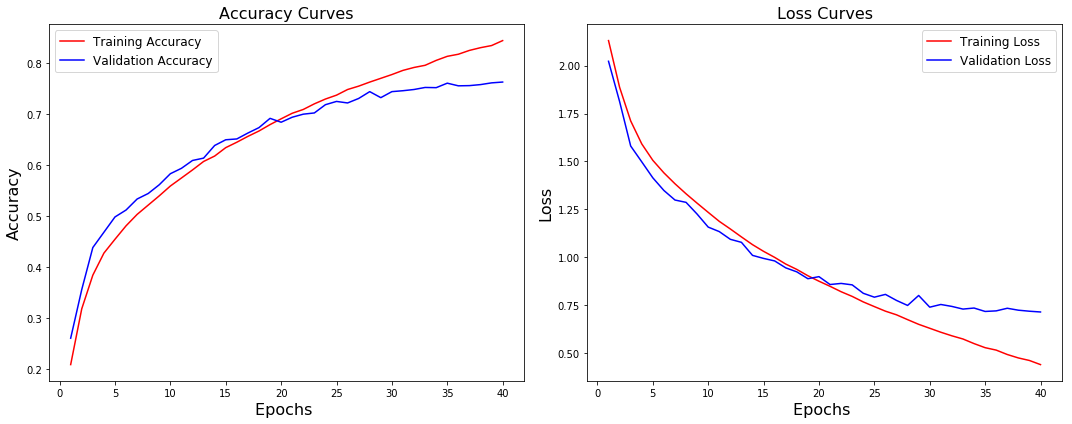

In [8]:
print('Test data loss: ' + str(results[0]))
print('Test data accuracy: ' + str(results[1]) + '\n')
print('Training accuracies: ' + str([round(acc, 5) for acc in history.acc]))
print('Validation accuracies: ' + str([round(acc, 5) for acc in history.val_acc]) + '\n')
print('Training losses: ' + str([round(loss, 5) for loss in history.loss]))
print('Validation losses: ' + str([round(loss, 5) for loss in history.val_loss]))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.acc, 'r', linewidth = 1.5)
plt.plot(range(1, epochs + 1), history.val_acc, 'b', linewidth = 1.5)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 12)
plt.xlabel('Epochs ',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.title('Accuracy Curves',fontsize = 16)

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.loss, 'r', linewidth = 1.5)
plt.plot(range(1, epochs + 1), history.val_loss, 'b', linewidth = 1.5)
plt.legend(['Training Loss', 'Validation Loss'], fontsize = 12)
plt.xlabel('Epochs ',fontsize = 16)
plt.ylabel('Loss',fontsize = 16)
plt.title('Loss Curves',fontsize = 16)

plt.tight_layout()
plt.show()

## Final Thoughts

For me this was an interesting tutorial to experiment more with CNNs. The results of this simple model were okay but still very improvable. To improve the model performance some ideas are: training for more epochs, altering the data inputs before evaluating them with the model, or even appending more layers to the CNN. 

## Summary and References

This tutorial covered only the basics of Convolutional Neural Networks. The concepts here can be very difficult to explain so some of the detailed parts were simplified. I would highly encourge you to read the source documentation for Keras or experiment with other libraries to find the one that works the best. Below are some links of interest regarding this tutorial.

  1. Fun Visual of CNNs with MNIST Dataset: http://scs.ryerson.ca/~aharley/vis/conv/flat.html 
  2. CIFAR-10 Dataset: https://www.cs.toronto.edu/~kriz/cifar.html  
  3. Keras: https://keras.io  
